# Direct Comparison of Quantum 3SAT algorithm, QAOASAT, and classical counterpart.  

## Shared functions/dependencies 

In [1]:
# Needed for functions
import time
import numpy as np
from numpy import pi
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
from QSAT import *
from Shonings import *

#import packages for classical algorithm
import ctypes
from numpy import ctypeslib as npct

#import packages for quantum algorithm
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.quantum_info as qi

from qiskit import Aer, transpile
# import qiskit.providers.aer
from qiskit_aer import AerError

from scipy.optimize import minimize

## Exhaustive search for solution

Helper functions for classical exhaustive search of solutions to SAT instance

In [2]:
def checkSAT(SAT, state, c, n):
        
    for t in range(c):
        # //get the variables the clause is interested in
        seive = (1 << (abs(int(SAT[t][0])) - 1)) + (1 << (int(abs(SAT[t][1])) - 1)) + (1 << (int(abs(SAT[t][2])) - 1))
        # //get the values in the clause to xor
        gate = 0
            
        if (SAT[t][0] > 0):
            gate += 1 << (abs(int((SAT[t][0]))) - 1)
        if (SAT[t][1] > 0):
            gate += 1 << (abs(int((SAT[t][1]))) - 1)
        if (SAT[t][2] > 0):
            gate += 1 << (abs(int((SAT[t][2]))) - 1)

        a = seive & state
        b = gate ^ a

        if (b == 0):
            return False
    return True

def exhausting(SAT,c,n):
    solutions = []
#     for t in range(c):
#         print((int(SAT[t][0]))," ",(int(SAT[t][1]))," ",(int(SAT[t][2])))
    
    for s in range(0,2**n):
        state = int(s)
        if(checkSAT(SAT, state, c, n)):
            solutions.append(state)
    return solutions
            

In [3]:
# SAT = buildSatSingleSolution(n)
# # random.shuffle(SAT)
# solutions = exhausting(SAT,c,n)
# print(solutions)

# myKeys = list(res.keys())
# myKeys.sort()
# sorted_dict = {i: res[i] for i in myKeys}
 
# print(sorted_dict)
# plt.plot(list(map(int,sorted_dict.keys())),sorted_dict.values())

# Test and compare quantum and classical algorithms

In [25]:
def setup(n,nc,nSAT):
    par = {}
    par['nQ'] = n
    par['nC'] = nc
    par['nSAT'] = nSAT
    par['sat'] = buildSatSingleSolution(par['nQ'])
    par['nC'] = len(par['sat'])
    par['satList'] = SATset(n,nc,nSAT)
    par['numRepeats'] = 1000
    par['numIt'] = nc
    par['maxIt'] = nc
    
#     par['theta'] = -np.pi/2
#     par['lambda'] = np.pi/2
    
    par['gamma'] = 2.008e+00 
    par['beta'] = -2.395e-04     
   
    
    #Plotting Conditionals
    par['latex'] = True
    par['statevector'] = True
    par['saveEnd'] = False
    par['figName'] = "plots/QAOASAT/{:0>3}.png".format(par['nQ'])
    par['xAsis'] = "$\frac{c}{v}$"
    par['yAsis'] = "$P(\text{solved})_{i<"+"+{}".format(par['maxIt'])+"}$"
    
    par['measure'] = False
    par['had'] = True
    
    par['gpu'] = False
    
    state = ''
    for q in range(n):
        state = state + '0'
    par['state'] = state
    
    return par

Initialize parameters for SAT instance

In [26]:
par = setup(4,16,1)

Run statistical test of modified Shonings algorithm

Run statistical test of regular Shonings algorithm

Run test of quantum algorithm

In [27]:
solutions = exhausting(par['sat'],par['nC'],par['nQ'])
print(solutions)
print(par['sat'])

[7]
[[-1, -2, -3], [-1, 2, 3], [1, -2, 3], [1, 2, -3], [-1, -2, 3], [-1, 2, -3], [1, -2, -3], [2, 3, 4], [-2, -3, -4], [-2, -3, 4]]


In [28]:
def toMin2(phases):
    probList3 = []
        
    par['gamma'] = phases[0]
    par['beta'] = phases[1]
#     par['numIt']  = phases[2]

    qc2 = buildCircuitCost(par,False)

    if(par['statevector']):
        # Execute and get counts
        DM2 = qi.DensityMatrix.from_instruction(qc2)
        # probs = DM.probabilities_dict()
        DM22 = qi.partial_trace(DM2,[par['nQ']])
        probs2 = DM22.probabilities_dict()
#         entropyList2.append(qi.entropy(DM22))

#     print("Iteration " + str(it) + " took " + str(start-time.time()))

    names2 = list(probs2.keys())
    values2 = list(probs2.values())
#         print(names2)
#         print(values2)

    totalProb2 = 0
#         print(solutions)
    for s in solutions:
#             print(s)
        totalProb2 += probs2[f'{s:04b}']
#     probList2.append(totalProb2)

    return 1 - totalProb2

In [29]:
par = setup(6,16,1)

[1. 1.]
[1. 1.]
[1.90519105 0.98518531]
[1.84448363 1.19454082]
[1.30976806 0.85146793]
[1.00565486 0.66419003]
[0.8389714  0.55509021]
[2.50855606 1.41357554]
[2.0532508  1.17957755]
[1.65908051 1.1122262 ]
[1.79158517 1.22102663]
[1.25275717 0.9288467 ]
[0.38994696 0.26336432]
[2.13371498 1.11982458]
[1.94772704 1.05345064]
[1.79313708 0.97954676]
Iteration 1 took -0.12695837020874023
Iteration 2 took -0.2225806713104248
Iteration 3 took -0.3217782974243164
Iteration 4 took -0.4203615188598633
Iteration 5 took -0.5051476955413818
Iteration 6 took -0.6027975082397461
Iteration 7 took -0.7717726230621338
Iteration 8 took -0.8076543807983398
Iteration 9 took -0.8989458084106445
Iteration 10 took -1.0451116561889648
Iteration 11 took -1.161022663116455
Iteration 12 took -1.1831793785095215
Iteration 13 took -1.3301045894622803
Iteration 14 took -1.4521992206573486
Iteration 15 took -1.4655811786651611
Iteration 16 took -1.6292083263397217
16


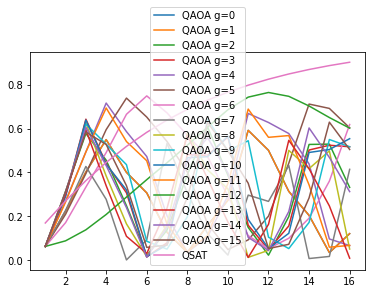

In [31]:
maxIt = par['maxIt']#c#n**2

probListGamma = []
probList2 = []
xs = np.linspace(1,maxIt,num = maxIt,dtype='int')
# par['sat'] = par['satList'][0]
# gammaList = np.linspace(0,2*np.pi,num = 6,dtype='float')

for g in range(maxIt):
    probListGamma.append([]) 
    
phaseList = []
gammaList = []
for g in range(maxIt):
    gammaList.append(g)
    par['numIt'] = g
    sendIt = [1.0,1.0]
    res = minimize(toMin2,sendIt,method='COBYLA',options={'disp': True, 'maxiter':50})
    phaseList.append(res.x)
    print(res.x)
an = par['nQ']
# print(gammaList)
for it in xs:
    par['numIt']  = it
    
#     shots = 10000 

    start = time.time()
    qc2 = buildCircuit(par,False)

    if(par['statevector']):
        # Execute and get counts
        DM2 = qi.DensityMatrix.from_instruction(qc2)
        # probs = DM.probabilities_dict()
        DM22 = qi.partial_trace(DM2,[par['nQ']])
        probs2 = DM22.probabilities_dict()

    names2 = list(probs2.keys())
    values2 = list(probs2.values())

    totalProb2 = 0
    
    for s in solutions:
        totalProb2 += probs2[f'{s:>0{an}b}']
    probList2.append(totalProb2)
    
    for g in range(maxIt):
        
        par['gamma'] = phaseList[g][0]
        par['beta'] = phaseList[g][1]
        
        
        qc2 = buildCircuitCost(par,False)
#         totalProb = 0
#         for s in solutions:
#             totalProb += list(probs.values())[s]
#         probList.append(totalProb)

        if(par['statevector']):
            # Execute and get counts
            DM2 = qi.DensityMatrix.from_instruction(qc2)
            # probs = DM.probabilities_dict()
            DM22 = qi.partial_trace(DM2,[par['nQ']])
            probs2 = DM22.probabilities_dict()

        

        names2 = list(probs2.keys())
        values2 = list(probs2.values())

        totalProb2 = 0
        for s in solutions:
            totalProb2 += probs2[f'{s:>0{an}b}']
        probListGamma[g].append(totalProb2)
      
    print("Iteration " + str(it) + " took " + str(start-time.time()))
    
for li in range(len(probListGamma)):
    name = "QAOA g="+ str(gammaList[li])
    plt.plot(xs, probListGamma[li] ,label=name)
    
print(len(probList2))
plt.plot(xs, probList2 ,label="QSAT")
    

    
plt.legend()

In [ ]:
def toMin(phases):
    probList3 = []
    # Initialize a GPU backend
    # Note that the cloud instance for tutorials does not have a GPU
    # so this will raise an exception.
    try:
        simulator_density_matrix = Aer.get_backend('aer_simulator_density_matrix')
#         simulator_density_matrix = Aer.get_backend('aer_simulator_statevector')
        simulator_density_matrix.set_options(device='GPU')
#         config = simulator_density_matrix.configuration()
#         print(str(config.multi_meas_enabled))
    except AerError as e:
        print(e)
        
    par['gamma'] = phases[0]
    par['beta'] = phases[1]
    par['numIt']  = 6
    shots = 10000

#     # Build circuit
#     start = time.time()
#     qc = buildCircuit(par,True)
#     circ = transpile(qc, simulator_density_matrix, optimization_level=0)
#     job_density_matrix = simulator_density_matrix.run(circ, shots=shots)
#     counts_density_matrix = job_density_matrix.result().get_counts(0)

#     print("Iteration " + str(it) + " took " + str(start-time.time()))

#     total = 0
#     for state in counts_density_matrix:
#         if(checkSAT(par['sat'], int(state, 2), len(par['sat']), par['nQ'])):
#             total += counts_density_matrix[state]

#     probList.append(total/shots)

    # Build circuit
#     start = time.time()
#     qc2 = buildCircuitMeasure(par,True)
#     circ2 = transpile(qc2, simulator_density_matrix, optimization_level=0)
#     job_density_matrix2 = simulator_density_matrix.run(circ2, shots=shots)#,dynamic=True
#     counts_density_matrix2 = job_density_matrix2.result().get_counts(0)

#     print("Iteration " + str(it) + " took " + str(start-time.time()))
# #         print(counts_density_matrix2)
#     total2 = 0
#     for state in counts_density_matrix2:
# #             print(state)
#         if(checkSAT(par['sat'], int(state, 2), len(par['sat']), par['nQ'])):
#             total2 += counts_density_matrix2[state]

#     probList2.append(total2/shots)

    # Build circuit
    start = time.time()
    qc3 = buildCircuitCost(par,True)
    circ3 = transpile(qc3, simulator_density_matrix, optimization_level=0)
    job_density_matrix3 = simulator_density_matrix.run(circ3, shots=shots)#,dynamic=True
    counts_density_matrix3 = job_density_matrix3.result().get_counts(0)

    print("Iteration cost" + str(it) + " took " + str(start-time.time()))
#         print(counts_density_matrix2)
    total3 = 0
    for state in counts_density_matrix3:
#             print(state)
        if(checkSAT(par['sat'], int(state, 2), len(par['sat']), par['nQ'])):
            total3 += counts_density_matrix3[state]

    return 1 - total3/shots

In [ ]:
sendIt = [1.0,1.0]
res = minimize(toMin2,sendIt,method='COBYLA')
print(res.x)
print(sendIt)

In [ ]:
print(probList[-1])

In [ ]:
plt.plot(base[:-1]+1, cumulative/numIt, c='blue')
plt.plot(baseS[:-1]+1, cumulativeS/numIt, c='green')
plt.plot(xs, probList, c='red')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(base[:-1]+1, cumulative/numIt, c='blue')
plt.plot(baseS[:-1]+1, cumulativeS/numIt, c='green')
plt.plot(xs, probList, c='red')
plt.xscale('log')